<a href="https://colab.research.google.com/github/memehabel/Habel-Portfolio/blob/main/Final_Project_AirbnbDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data and Packages

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Set the directory where the images are stored
dir = '/content/gdrive/MyDrive/IS 8036 Final Project'      #/content/drive/My Drive/MLCourse/Airbnb

#Pass your own folder path here
#Dwonload the csv "Airbnb_Listings.csv" from Kaggle and save it to your Google Drive directory
#Here it is saved in the ../MLcourse folder.
## Make sure to adjust other paths in this code accordingly
listing_data=pd.read_csv(dir+'/Airbnb_Listings.csv')
listing_data.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,4952,https://www.airbnb.com/rooms/4952,20200530151957,2020-05-30,Butterfly Inn - Graceful Living !,Lovely garden setting in a serene and art-fill...,Very comfortable Queen bed and small desk in b...,Lovely garden setting in a serene and art-fill...,none,"Located in Professorville, Palo Alto, one of t...",...,f,f,moderate,f,f,5,0,5,0,0.57
1,11464,https://www.airbnb.com/rooms/11464,20200530151957,2020-05-31,Deluxe Private Studio-custom int.,Custom built Studio with exquisite design. Rea...,Description A favorite for international corpo...,Custom built Studio with exquisite design. Rea...,none,10 min. to Lucky's and Starbucks at El Camino ...,...,f,f,moderate,f,t,12,12,0,0,0.08
2,17884,https://www.airbnb.com/rooms/17884,20200530151957,2020-05-31,Silicon Valley Suite,"A guest suite for one or two, in a house in a ...",This is a private suite at the rear of a house...,"A guest suite for one or two, in a house in a ...",none,"This is a very quiet family neighborhood, but ...",...,f,f,strict_14_with_grace_period,f,f,2,2,0,0,0.11
3,21373,https://www.airbnb.com/rooms/21373,20200530151957,2020-05-30,Bonsai Garden Inn in Professorville,Room in gracious home with beautiful garden. ...,"Bright, garden-facing room in beautiful home. ...",Room in gracious home with beautiful garden. ...,none,This room is in an ultra convenient location i...,...,f,f,moderate,f,f,5,0,5,0,2.17
4,37512,https://www.airbnb.com/rooms/37512,20200530151957,2020-05-31,Private room - Parking 3 carport,We live in a safe community close to public tr...,I have a really nice room in a quiet neighborh...,We live in a safe community close to public tr...,none,Our community is a safe environment and at nig...,...,f,f,moderate,t,t,2,0,2,0,1.53


# Data Preparation

In [4]:
print(listing_data.shape)
for col in listing_data.columns:
  print (col)

(7221, 106)
id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_night

In [5]:
# Remove trailing spaces from all string columns
listing_data = listing_data.apply(lambda x: x.str.strip() if x.dtype == 'object' else x)

In [6]:
# Capitalize each word in the 'city' column
listing_data['city'] = listing_data['city'].str.title()


In [7]:
# Convert 'price' colummn

# Determine data type of 'price' column
listing_data['price'].dtypes

# First, convert the 'price' from object to string
listing_data['price'] = listing_data['price'].astype(str)


# Remove symbols
listing_data['price'] = listing_data['price'].str.replace('$', '')
listing_data['price'] = listing_data['price'].str.replace('.00', '')
listing_data['price'] = listing_data['price'].str.replace(',', '')
listing_data['price'].head(50)

# Convert 'price' column to numeric data type
listing_data['price'] = pd.to_numeric(listing_data['price'], errors='coerce')


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error

# Drop useless columns
drop_columns = ['license', 'neighbourhood_group_cleansed', 'has_availability',
                'requires_license', 'is_business_travel_ready', 'xl_picture_url',
                'experiences_offered']
data = listing_data.drop(columns=drop_columns)

# Convert categorical variables to dummy variables
categorical_columns = ['neighbourhood', 'room_type', 'city', 'property_type',
                       'bed_type']
data = pd.get_dummies(data, columns = categorical_columns)

# Print the new shape of the data frame after creating dummy variables
print("New shape of data: ", data.shape)


New shape of data:  (7221, 192)


In [9]:
for col in data.columns:
  print (col)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood_cleansed
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
accommodates
bathrooms
bedrooms
beds
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
calendar_updated
availability_30
availability_60
availability_90
availability_36

# Analysis

## Average Price and Count of Listings for each City

In [10]:
# Group data by 'city' and calculate avg price and count of listings for each city
average_price_and_count_by_city = listing_data.groupby('city').agg({'price': 'mean', 'id': 'count'}).reset_index()

# Rename columns
average_price_and_count_by_city.columns = ['City', 'Average Price', 'Number of Listings']

# Sort tby 'Average Price' column in descending order
average_price_and_count_by_city_sorted = average_price_and_count_by_city.sort_values(by='Average Price', ascending=False)

# Print results
print(average_price_and_count_by_city_sorted)

                  City  Average Price  Number of Listings
19            Saratoga     300.971429                  70
2             Danville     280.000000                   1
8            Los Gatos     261.447761                 134
9           Menlo Park     253.500000                   4
7      Los Altos Hills     253.150943                  53
5            Hollister     248.000000                   2
6            Los Altos     235.741573                  89
20            Stanford     228.666667                   3
16          San Martin     225.933333                  15
13       Mountain View     224.042042                 666
14           Palo Alto     221.733586                 792
12         Morgan Hill     162.936508                  63
17         Santa Clara     155.422969                 714
0             Campbell     153.449612                 129
4               Gilroy     145.187500                  32
15            San Jose     138.614776                3032
11        Mont

In [11]:
average_price_and_count_by_city_sorted

,City,Average Price,Number of Listings
19,Saratoga,300.971429,70
2,Danville,280.000000,1
8,Los Gatos,261.447761,134
9,Menlo Park,253.500000,4
7,Los Altos Hills,253.150943,53
5,Hollister,248.000000,2
6,Los Altos,235.741573,89
20,Stanford,228.666667,3
16,San Martin,225.933333,15
13,Mountain View,224.042042,666


In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Average Price based on Room Type

In [13]:
# Group data by 'room_type' and calculate avg price and count of listings for each city
average_price_by_room_type = listing_data.groupby('room_type')['price'].mean().reset_index()

# Rename columns
average_price_by_room_type.columns = ['Room Type', 'Average Price']

# Sort by 'Average Price' column in descending order
average_price_by_room_type_sorted = average_price_by_room_type.sort_values(by='Average Price', ascending=False)

# Print results
print(average_price_by_room_type_sorted)

         Room Type  Average Price
0  Entire home/apt     232.994754
1       Hotel room     184.500000
2     Private room     100.389114
3      Shared room      54.299401


## Average Price by Room Type and Number of Bedrooms

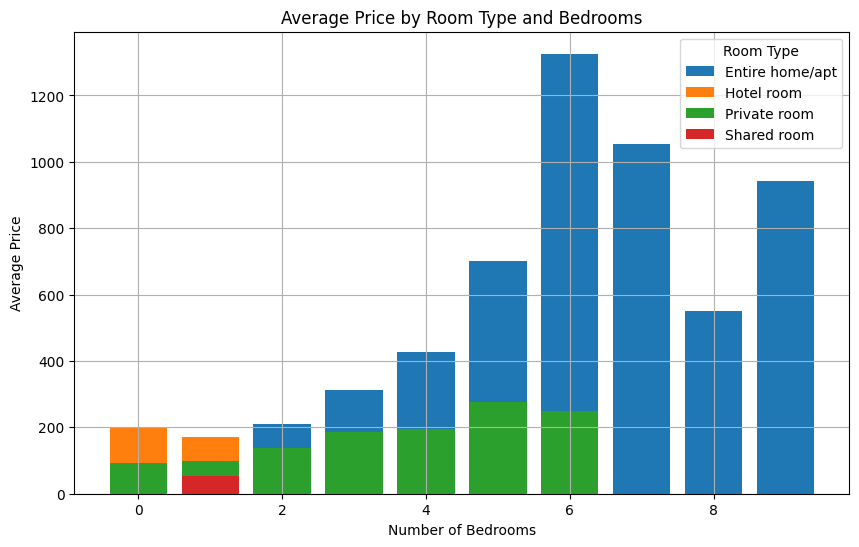

In [14]:
import matplotlib.pyplot as plt

# Group data by 'room_type' and 'bedrooms' and calculate the average price for each combination
average_price_by_room_type_and_bedrooms = listing_data.groupby(['room_type', 'bedrooms'])['price'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
for room_type in average_price_by_room_type_and_bedrooms['room_type'].unique():
    subset = average_price_by_room_type_and_bedrooms[average_price_by_room_type_and_bedrooms['room_type'] == room_type]
    plt.bar(subset['bedrooms'], subset['price'], label=room_type)

plt.title('Average Price by Room Type and Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.legend(title='Room Type')
plt.grid(True)
plt.show()


## Number of Bedrooms vs. Price

<ipython-input-15-118a51a7cfb5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_bedrooms['price_group'] = pd.cut(filtered_bedrooms['price'], bins=price_bins, labels=price_labels)


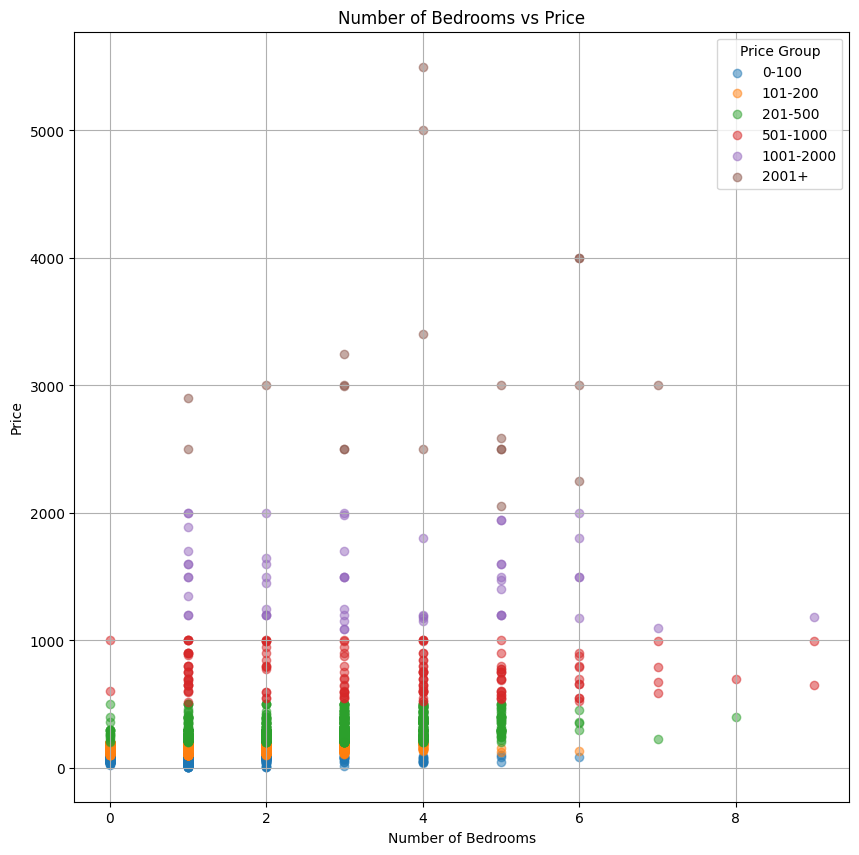

In [15]:
import matplotlib.pyplot as plt

# Filter data to limit price to a maximum of 6000 and number of bedrooms to a maximum of 25
filtered_bedrooms = data[(data['price'] <= 6000) & (data['bedrooms'] <= 25)]

# Define price bins
price_bins = [0, 100, 200, 500, 1000, 2000, float('inf')]
price_labels = ['0-100', '101-200', '201-500', '501-1000', '1001-2000', '2001+']

# Group prices into bins
filtered_bedrooms['price_group'] = pd.cut(filtered_bedrooms['price'], bins=price_bins, labels=price_labels)

# Plot
plt.figure(figsize=(10, 10))
for price_group in price_labels:
    subset = filtered_bedrooms[filtered_bedrooms['price_group'] == price_group]
    plt.scatter(subset['bedrooms'], subset['price'], label=price_group, alpha=0.5)

plt.title('Number of Bedrooms vs Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.legend(title='Price Group')
plt.grid(True)
plt.show()



# Linear Regression

## Select Variables for Linear Regression Models

In [16]:
selected_data=data[['city_Campbell', 'city_Cupertino', 'city_Danville', 'city_Fremont', 'city_Gilroy',
         'city_Hollister', 'city_Los Altos', 'city_Los Altos Hills', 'city_Los Gatos',
         'city_Menlo Park', 'city_Milpitas', 'city_Monte Sereno', 'city_Morgan Hill', 'city_Mountain View',
         'city_Palo Alto', 'city_San Jose', 'city_San Martin', 'city_Santa Clara', 'city_Santa Clara County',
         'city_Saratoga', 'city_Stanford', 'city_Sunnyvale', 'city_Watsonville',
          'accommodates', 'bathrooms', 'bedrooms', 'beds', 'room_type_Entire home/apt', 'room_type_Hotel room',
         'room_type_Private room', 'room_type_Shared room', 'price']]

selected_data=selected_data.dropna()

# Print the new shape of the data frame after selecting variables and dropping null values
print("The shape of the selected data: ", selected_data.shape)

The shape of the selected data:  (7147, 32)


## Create Linear Regression Model


In [17]:
# Split the data into features (X) and target variable (y)
X = selected_data.drop(columns=['price'])
y = selected_data[['price']]


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)



Mean Squared Error: 102583.66224720149


In [18]:
# Get the regression coefficients (weights) and corresponding variable names
coefficients = model.coef_[0]
variable_names = X.columns

# Print results
for variable, coefficient in zip(variable_names, coefficients):
    print(f"{variable}: {coefficient}")


city_Campbell: 47.11047737058317
city_Cupertino: 50.7726308941952
city_Danville: -92.94490967633477
city_Fremont: 34.706531887728964
city_Gilroy: 24.268506676959305
city_Hollister: 168.77732487248815
city_Los Altos: 122.65404248458718
city_Los Altos Hills: 167.93753705828325
city_Los Gatos: 184.98950507266517
city_Menlo Park: 154.18327675259016
city_Milpitas: 29.714508497093085
city_Monte Sereno: 91.24834958525021
city_Morgan Hill: 63.34631266718207
city_Mountain View: 141.8565714875276
city_Palo Alto: 120.47316827465585
city_San Jose: 48.39107583017243
city_San Martin: 100.10421804784009
city_Santa Clara: 77.65915358685783
city_Santa Clara County: 2.5579538487363607e-13
city_Saratoga: 139.29270696959682
city_Stanford: 289.16090648270864
city_Sunnyvale: 52.116664801070314
city_Watsonville: 0.0
accommodates: 16.20512955833093
bathrooms: 71.0464590783753
bedrooms: 46.07790264706451
beds: -1.9733224935583529
room_type_Entire home/apt: 25.527224014069894
room_type_Hotel room: 60.6594203726